In [296]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [297]:
data_trans=pd.read_excel(r"C:\Users\Geetha\Desktop\KPMG\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='Transactions')
data_cust_demo=pd.read_excel(r"C:\Users\Geetha\Desktop\KPMG\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerDemographic')
data_cust_add=pd.read_excel(r"C:\Users\Geetha\Desktop\KPMG\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerAddress')
data_new_cust=pd.read_excel(r"C:\Users\Geetha\Desktop\KPMG\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='NewCustomerList')

# DATA UNDERSTANDING

In [298]:
data_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


"head" gives the top 5 rows of dataset

In [299]:
#checking null
data_trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

checks if there are any null values, we can either replace them with median/mean/mode or can remove the rows based on the dependency of feature on target variable.

In [300]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


"info" presents information like data types, total number of records and columns and memory used. Since product_first_sold_date
is not in datetime format, converted the same.

In [301]:
data_trans['product_first_sold_date']=pd.to_datetime(data_trans['product_first_sold_date'], unit='ns')

In [302]:
data_trans['product_first_sold_date'].head()

0   1970-01-01 00:00:00.000041245
1   1970-01-01 00:00:00.000041701
2   1970-01-01 00:00:00.000036361
3   1970-01-01 00:00:00.000036145
4   1970-01-01 00:00:00.000042226
Name: product_first_sold_date, dtype: datetime64[ns]

In [303]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(3), object(5)
memory usage: 2.0+ MB


In [304]:
data_trans.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [305]:
len(data_trans.columns)

13

In [306]:
data_trans['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

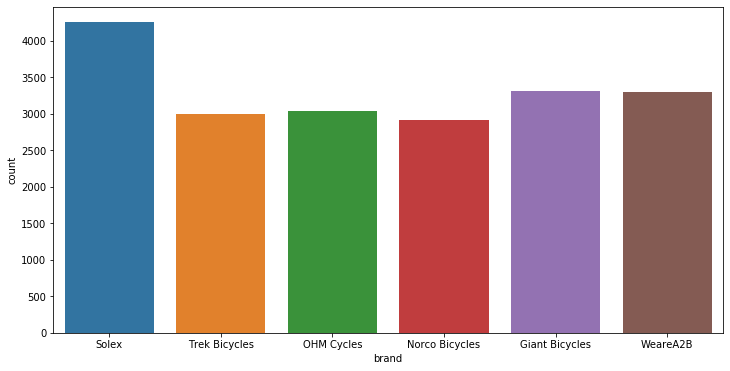

In [307]:
plt.figure(figsize=(12,6))
sns.countplot('brand', data=data_trans)

In [308]:
data_trans['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

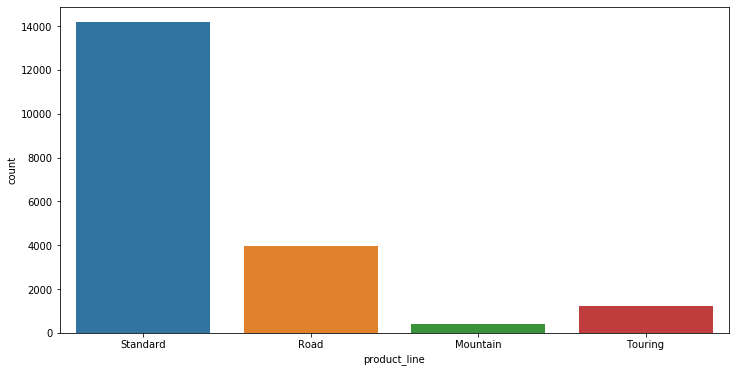

In [309]:
plt.figure(figsize=(12,6))
sns.countplot('product_line', data=data_trans)

In [310]:
data_trans['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

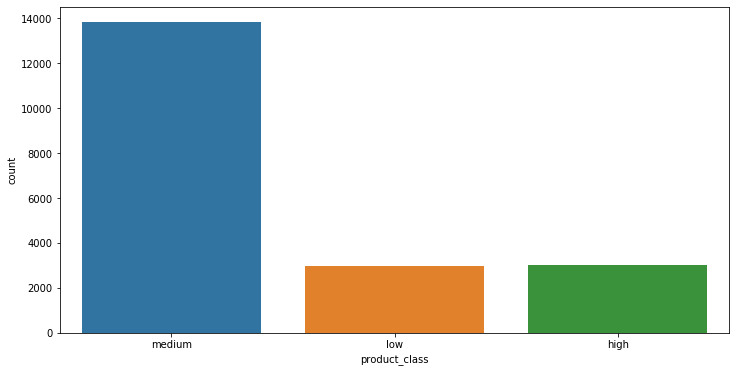

In [311]:
plt.figure(figsize=(12,6))
sns.countplot('product_class', data=data_trans)

In [312]:
data_trans['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

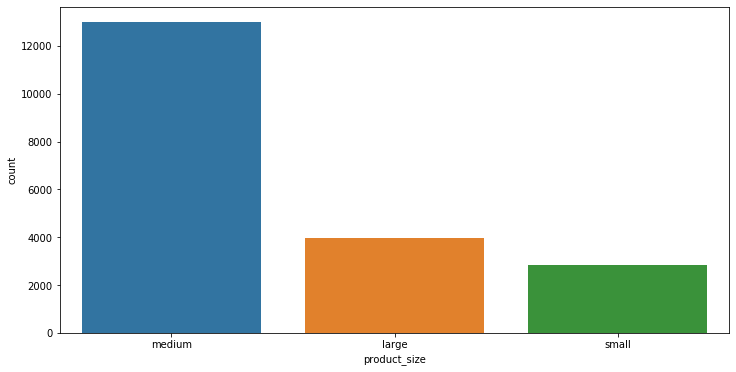

In [313]:
plt.figure(figsize=(12,6))
sns.countplot('product_size', data=data_trans)

# Customer Demographic data Analysis

In [314]:
data_cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [315]:
data_cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

lastname there are 105 blanks and we can either drop the column or replace them with some random name because we have first name complete details. job_industry_category has 551 "Null" values.

In [316]:
data_cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 375.1+ KB


In [317]:
data_cust_demo['gender'].value_counts()

F    2039
M    1873
U      88
Name: gender, dtype: int64

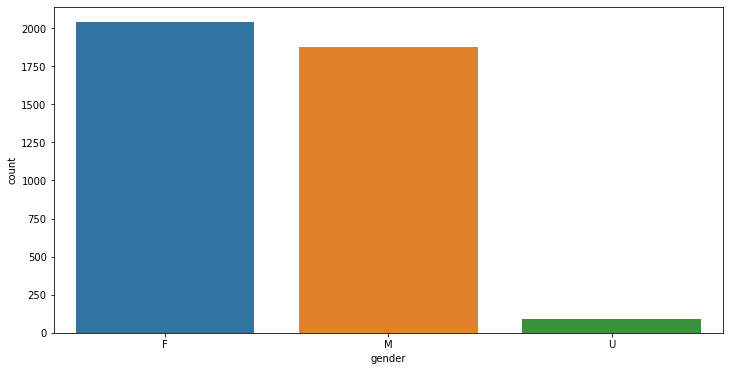

In [318]:
plt.figure(figsize=(12,6))
sns.countplot('gender', data=data_cust_demo)

In [319]:
data_cust_demo['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

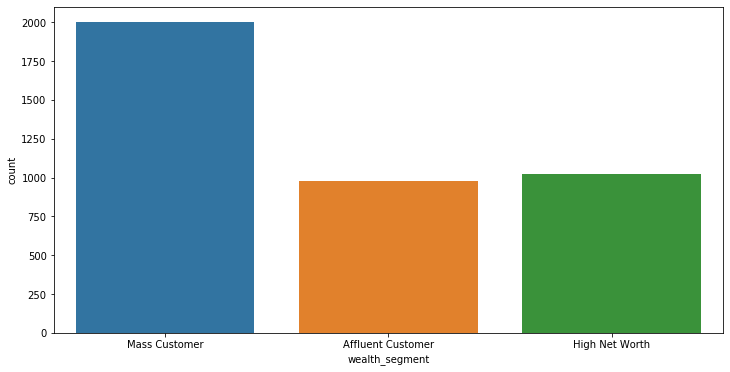

In [320]:
plt.figure(figsize=(12,6))
sns.countplot('wealth_segment', data=data_cust_demo)

In [321]:
data_cust_demo['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

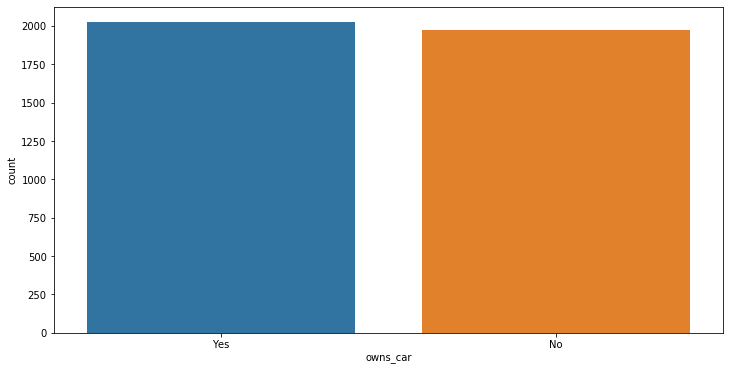

In [322]:
plt.figure(figsize=(12,6))
sns.countplot('owns_car', data=data_cust_demo)

# Exploring Customer New List

In [323]:
data_new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.73,0.9125,1.140625,0.969531,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.43,0.4300,0.537500,0.456875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.77,0.7700,0.770000,0.770000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.90,1.1250,1.125000,1.125000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.85,0.8500,1.062500,1.062500,4,4,1.703125


In [324]:
data_new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
first_name                             1000 non-null object
last_name                              971 non-null object
gender                                 1000 non-null object
past_3_years_bike_related_purchases    1000 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              894 non-null object
job_industry_category                  835 non-null object
wealth_segment                         1000 non-null object
deceased_indicator                     1000 non-null object
owns_car                               1000 non-null object
tenure                                 1000 non-null int64
address                                1000 non-null object
postcode                               1000 non-null int64
state                                  1000 non-null object
country                                1000 non-null 

In [325]:
data_new_cust=data_new_cust.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'],axis=1)
data_new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [326]:
data_new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

# merge the data of customer demographic, customer address and new customer list. 

Since to merge the data, we need to have same columns. So added customer id to new customer list and to customer demographic
merged customer address.

In [327]:
data_new_cust.insert(0, 'customer_id', range(4001, 4001+len(data_new_cust)))

In [328]:
data_new_cust

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,4001,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,4002,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,4003,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,4005,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
5,4006,Druci,Brandli,Female,39,1951-04-29,Assistant Media Planner,Entertainment,High Net Worth,N,Yes,22,89105 Pearson Terrace,4075,QLD,Australia,7,6,1.671875
6,4007,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,8,7 Nevada Crossing,2620,NSW,Australia,7,6,1.671875
7,4008,Nancie,Vian,Female,74,1972-12-27,Human Resources Assistant II,Retail,Mass Customer,N,Yes,10,85 Carioca Point,4814,QLD,Australia,5,8,1.656250
8,4009,Duff,Karlowicz,Male,50,1972-04-28,Speech Pathologist,Manufacturing,Mass Customer,N,Yes,5,717 West Drive,2200,NSW,Australia,10,8,1.656250
9,4010,Barthel,Docket,Male,72,1985-08-02,Accounting Assistant IV,IT,Mass Customer,N,Yes,17,80 Scofield Junction,4151,QLD,Australia,5,10,1.640625


In [329]:
data_cust_demo=pd.merge(data_cust_demo, data_cust_add, how='left', sort=False, on='customer_id')

In [330]:
data_cust_demo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,NSW,Australia,4.0
5,6,Curr,Duckhouse,M,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216.0,VIC,Australia,9.0
6,7,Fina,Merali,F,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,4 Delaware Trail,2210.0,NSW,Australia,9.0
7,8,Rod,Inder,M,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,49 Londonderry Lane,2650.0,NSW,Australia,4.0
8,9,Mala,Lind,F,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,97736 7th Trail,2023.0,NSW,Australia,12.0
9,10,Fiorenze,Birdall,F,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,NaN,NaN,NaN,NaN,NaN


Now, we have same features in both the datasets, we combine them.

In [331]:
new_data=pd.concat([data_cust_demo,data_new_cust],sort=False, ignore_index=True)

In [332]:
new_data

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,NSW,Australia,10.0,NaN,NaN
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,NaN,NaN
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,NaN,NaN
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,NSW,Australia,4.0,NaN,NaN
5,6,Curr,Duckhouse,M,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216.0,VIC,Australia,9.0,NaN,NaN
6,7,Fina,Merali,F,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,4 Delaware Trail,2210.0,NSW,Australia,9.0,NaN,NaN
7,8,Rod,Inder,M,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,49 Londonderry Lane,2650.0,NSW,Australia,4.0,NaN,NaN
8,9,Mala,Lind,F,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,97736 7th Trail,2023.0,NSW,Australia,12.0,NaN,NaN
9,10,Fiorenze,Birdall,F,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [333]:
data_cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,NSW,Australia,4.0


In [334]:
data_cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
address                                  4
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
dtype: int64

In [292]:
#past_3_years_bike_related_purchases Vs Gender
#Gender=pd.get_dummies(data_cust_demo['gender'], drop_first=True)
#data_cust_demo.drop(['gender'], axis=1, inplace=True)
#data_cust_demo=pd.concat([data_cust_demo,Gender], axis=1)

In [294]:
#data_cust_demo.head()

,customer_id,first_name,last_name,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,M,U
0,1,Laraine,Medendorp,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,0,0
1,2,Eli,Bockman,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1,0
2,3,Arlin,Dearle,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1,0
3,4,Talbot,NaN,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1,0
4,5,Sheila-kathryn,Calton,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,0,0


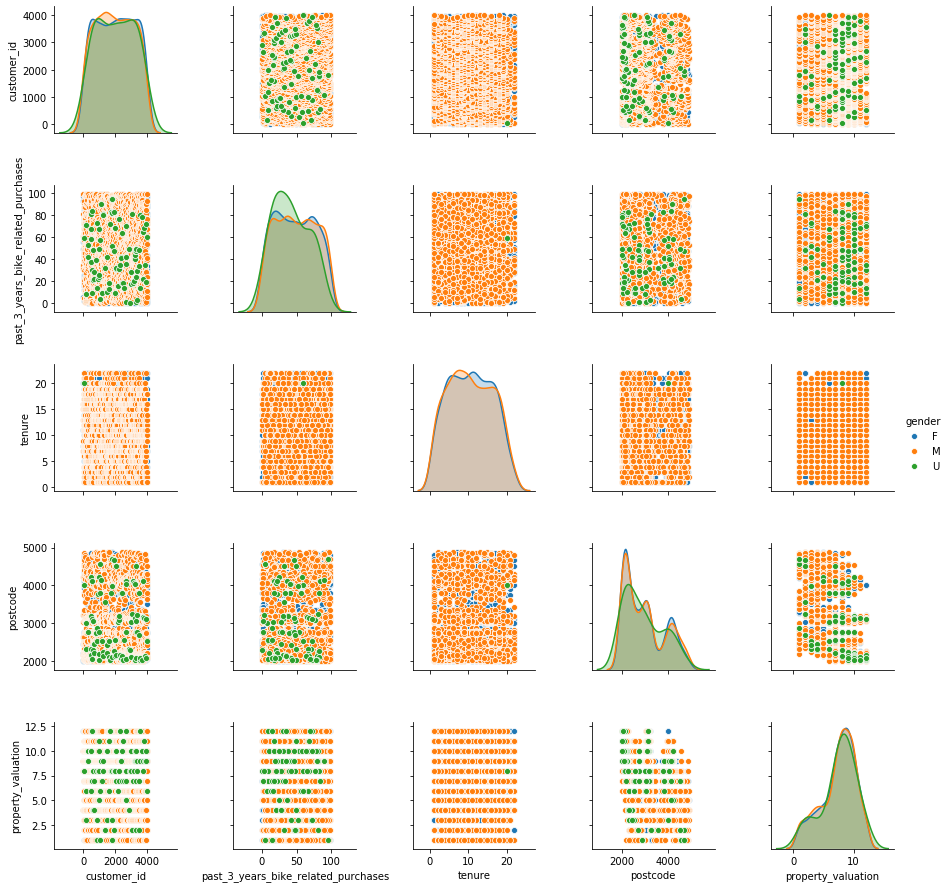

In [337]:
sns.pairplot(data_cust_demo, hue='gender')

In [343]:
total= sum(data_cust_demo['past_3_years_bike_related_purchases'])
total

195560

[0.5029607281652689, 0.47802720392718345, 0.019012067907547555]
[F    2039
Name: gender, dtype: int64, M    1873
Name: gender, dtype: int64, U    88
Name: gender, dtype: int64]


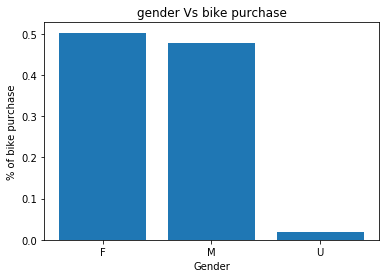

In [375]:
sum_total=[0,0,0]
gender_count=[0,0,0]
j=0
gender_cat=['F','M','U']
for i in gender_cat:
    select_gender= data_cust_demo.loc[data_cust_demo['gender'] == i]
    gender_count[j]=select_gender['gender'].value_counts()
    sum_total[j]=(select_gender['past_3_years_bike_related_purchases'].sum())/total
    j=j+1
plt.bar(gender_cat,sum_total, align='center')
plt.title('gender Vs bike purchase')
plt.xlabel('Gender')
plt.ylabel('% of bike purchase')        
print(sum_total)
print(gender_count)

In [385]:
from datetime import date
now = pd.to_datetime('now') 
print(now)
data_cust_demo['age'] = (now - data_cust_demo['DOB']).astype('<m8[Y]') 

2020-08-07 00:52:48.872841


In [386]:
data_cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,NSW,Australia,10.0,66.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,39.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN,66.0
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,58.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,NSW,Australia,4.0,43.0


In [388]:
data_cust_demo['age'].describe()

count    3913.000000
mean       42.568106
std        12.798502
min        18.000000
25%        33.000000
50%        43.000000
75%        52.000000
max       176.000000
Name: age, dtype: float64

The max value of age 176 seem to be an outlier so it is better to get rid of the same.

In [403]:
data_cust_demo.drop(data_cust_demo[data_cust_demo['age']==176].index, axis=0, inplace=True)

In [404]:
data_cust_demo['age'].describe()

count    3912.000000
mean       42.533998
std        12.621017
min        18.000000
25%        33.000000
50%        43.000000
75%        52.000000
max        88.000000
Name: age, dtype: float64

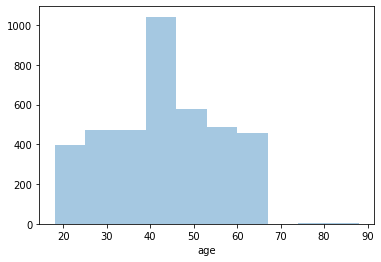

In [406]:
sns.distplot(data_cust_demo['age'], kde=False, bins=10)

In [413]:
counts = data_cust_demo.groupby(['age','gender']).count()
counts

customer_id  first_name  last_name  \
age  gender                                       
18.0 F                11          11         11   
     M                 9           9          8   
19.0 F                22          22         21   
     M                13          13         12   
20.0 F                19          19         19   
     M                33          33         32   
21.0 F                42          42         41   
     M                33          33         31   
22.0 F                37          37         36   
     M                30          30         29   
23.0 F                39          39         36   
     M                39          39         37   
24.0 F                37          37         35   
     M                34          34         33   
25.0 F                41          41         39   
     M                47          47         46   
26.0 F                34          34         34   
     M                33          33         31   
27.0 F                20          20         18   
     M                41          41         40   
28.0 F                37          37         34   
     M                33          33         32   
29.0 F                23          23         22   
     M                17          17         17   
30.0 F                44          44         44   
     M                29          29         29   
31.0 F                42          42         40   
     M                31          31         30   
32.0 F                43          43         42   
     M                28          28         27   
...                  ...         ...        ...   
54.0 F                28          28         26   
     M                38          38         34   
55.0 F                43          43         41   
     M                33          33         32   
56.0 F                36          36         36   
     M                40          40         39   
57.0 F                34          34         34   
     M                28          28         28   
58.0 F                40          40         40   
     M                36          36         34   
59.0 F                28          28         28   
     M                28          28         28   
60.0 F                42          42         42   
     M                31          31         30   
61.0 F                43          43         41   
     M                39          39         38   
62.0 F                25          25         24   
     M                34          34         34   
63.0 F                32          32         31   
     M                34          34         32   
64.0 F                34          34         32   
     M                28          28         28   
65.0 F                23          23         23   
     M                38          38         37   
66.0 F                34          34         33   
     M                20          20         18   
76.0 M                 2           2          2   
79.0 F                 1           1          1   
84.0 F                 1           1          1   
88.0 M                 1           1          1   

             past_3_years_bike_related_purchases  DOB  job_title  \
age  gender                                                        
18.0 F                                        11   11         11   
     M                                         9    9          7   
19.0 F                                        22   22         18   
     M                                        13   13         12   
20.0 F                                        19   19         18   
     M                                        33   33         26   
21.0 F                                        42   42         39   
     M                                        33   33         30   
22.0 F                                        37   37         33   
     M                                        30   

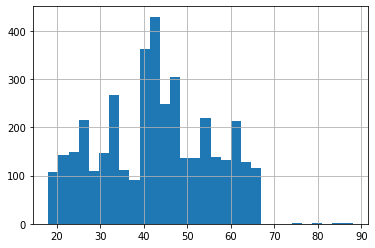

In [418]:
data_cust_demo['age'].hist(bins=0)

In [460]:
min(data_cust_demo.age)

18.0

In [461]:
max(data_cust_demo.age)

88.0

In [466]:
data_cust_demo['age_bins']=pd.cut(data_cust_demo.age, bins=[15,25,35,45,55,65,75,85,95],labels=['15_to_25', '25_to_35', '35_to_45', '45_to_55','55_to_65','65_to_75','75_to_85','85_to_95'])

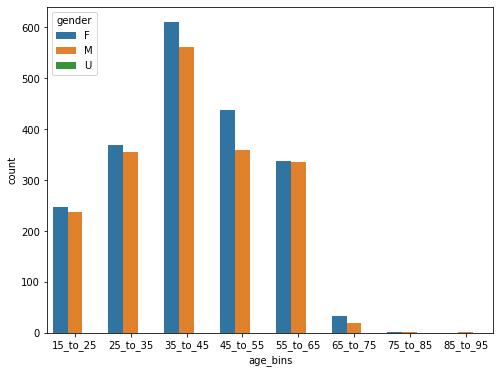

In [479]:
plt.figure(figsize=(8,6))
#data_cust_demo.groupby('gender').age.hist(bins=10)
sns.countplot(data=data_cust_demo, x = 'age_bins', hue='gender')
#plt.figure(figsize=(20,6))
#sns.barplot(x='age', y='past_3_years_bike_related_purchases', data=data_cust_demo)

In [469]:
min(data_new_cust['age'])

18.0

In [470]:
max(data_new_cust['age'])

82.0

In [471]:
data_new_cust['age_bins']=pd.cut(data_new_cust.age, bins=[15,25,35,45,55,65,75,85],labels=['15_to_25', '25_to_35', '35_to_45', '45_to_55','55_to_65','65_to_75','75_to_85'])

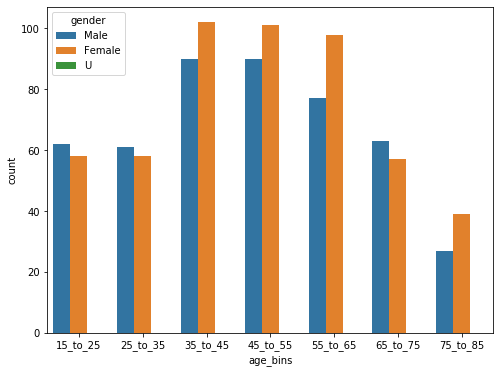

In [480]:
plt.figure(figsize=(8,6))
#data_cust_demo.groupby('gender').age.hist(bins=10)
sns.countplot(data=data_new_cust, x = 'age_bins',hue='gender')

In [433]:
data_cust_demo['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    222
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

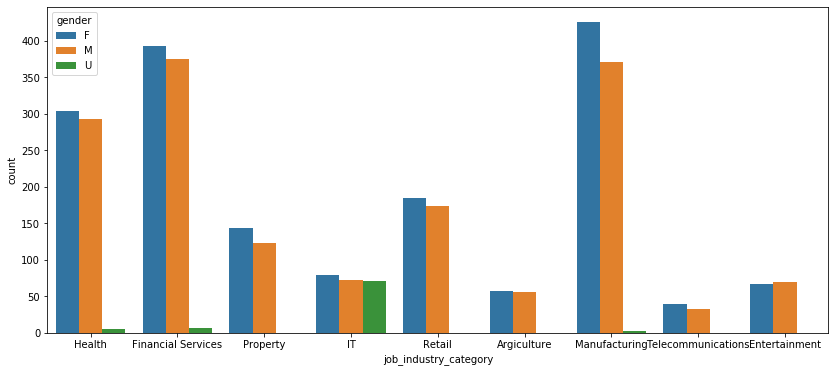

In [488]:
plt.figure(figsize=(14,6))
sns.countplot(data=data_cust_demo, x = 'job_industry_category', hue = 'gender')

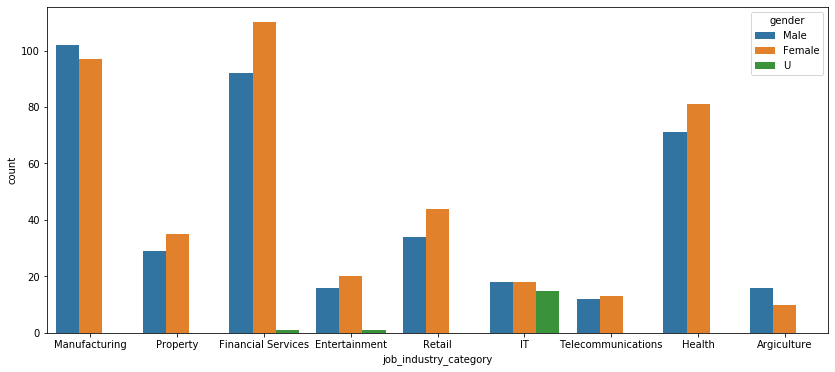

In [489]:
plt.figure(figsize=(14,6))
sns.countplot(data=data_new_cust, x = 'job_industry_category', hue = 'gender')

By comparing the above two graphs, top two industries are Manufacturing and Financial services.

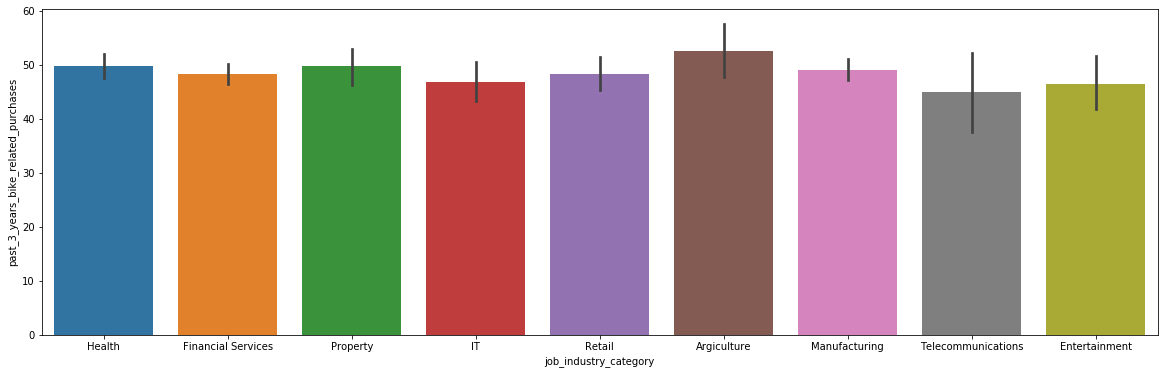

In [435]:
plt.figure(figsize=(20,6))
sns.barplot(x='job_industry_category', y='past_3_years_bike_related_purchases', data=data_cust_demo)

From above graph, we observe that the number of past purchase is higher for Agriculture job industry but the number of
people are very few in that category.

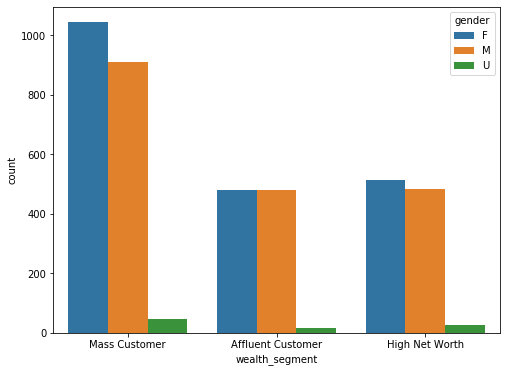

In [490]:
plt.figure(figsize=(8,6))
sns.countplot(data=data_cust_demo, x = 'wealth_segment', hue = 'gender')

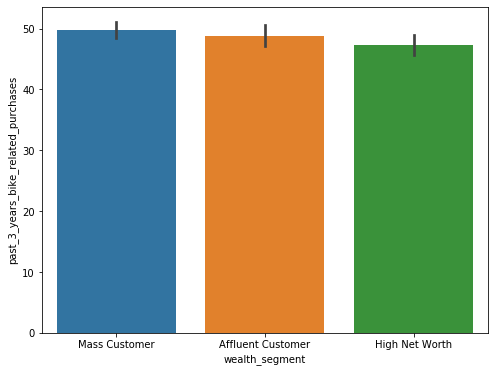

In [492]:
plt.figure(figsize=(8,6))
sns.barplot(x='wealth_segment', y='past_3_years_bike_related_purchases', data=data_cust_demo)

From the above two graphs, we can observe that Mass customers are more but the number of purchase is approximately similar to
that of Affluent customer and High Net Worth whose count of customers is much lesser when compared with that of Mass customer.

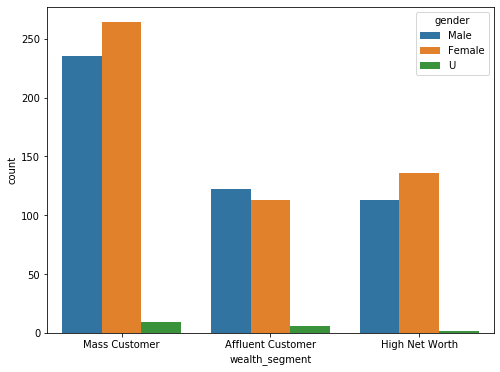

In [491]:
plt.figure(figsize=(8,6))
sns.countplot(data=data_new_cust, x = 'wealth_segment', hue = 'gender')

Even in new customer list, Mass customer is higher. But, we should consider High net worth, affluent customer and Mass customer
segment because the number of purchases is more with respect to number of people.

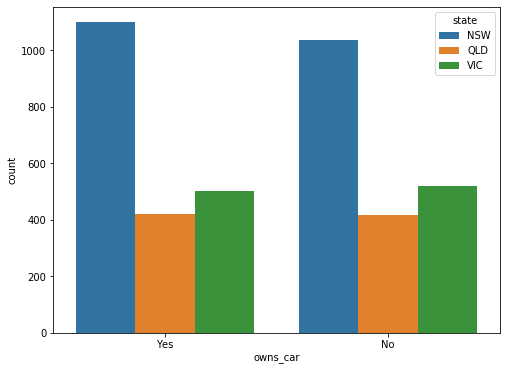

In [493]:
plt.figure(figsize=(8,6))
sns.countplot(data=data_cust_demo, x = 'owns_car', hue = 'state')

We see that, more customers are from state NSW with a slight difference of owning a car and not owning a car, and almost
population of owning a car and not owning a car in QLD and VIC.

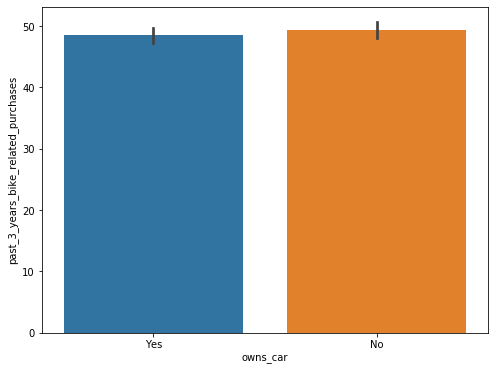

In [451]:
plt.figure(figsize=(8,6))
sns.barplot(x='owns_car', y='past_3_years_bike_related_purchases', data=data_cust_demo)

There population who does not own a car has a slight more purchase than that owns a car.

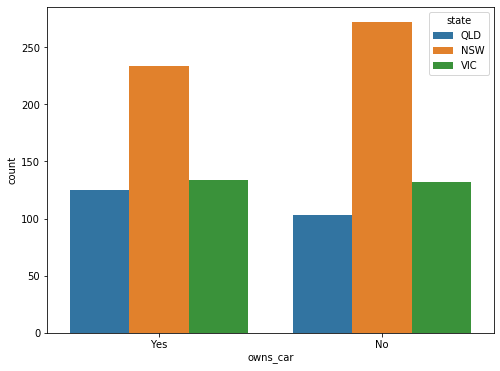

In [494]:
plt.figure(figsize=(8,6))
sns.countplot(data=data_new_cust, x = 'owns_car', hue = 'state')

In new customer list, the population who does not own a car is higher than the other in NSW, where as in QLD the population owning car is higher and in VIC both the population are almost similar.